In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


# Normalize pixel values to between 0 and 1

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Choose between ResNet50 or VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Freeze the convolutional base

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


# Create the final model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 947ms/step - accuracy: 0.4787 - loss: 1.4988 - val_accuracy: 0.5585 - val_loss: 1.2383
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 948ms/step - accuracy: 0.5859 - loss: 1.1840 - val_accuracy: 0.5907 - val_loss: 1.1648
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 758s 968ms/step - accuracy: 0.6157 - loss: 1.1020 - val_accuracy: 0.6025 - val_loss: 1.1310
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 802s 969ms/step - accuracy: 0.6348 - loss: 1.0370 - val_accuracy: 0.6075 - val_loss: 1.1198
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 805s 973ms/step - accuracy: 0.6529 - loss: 0.9882 - val_accuracy: 0.6082 - val_loss: 1.1079
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 800s 969ms/step - accuracy: 0.6718 - loss: 0.9408 - val_accuracy: 0.6104 - val_loss: 1.1265
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 800s 967ms/step - accuracy: 0.6794 - loss: 0.9068 - val_accuracy: 0.6161 - val_loss: 1.1084
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 799s 963ms/step - accuracy: 0.6948 -

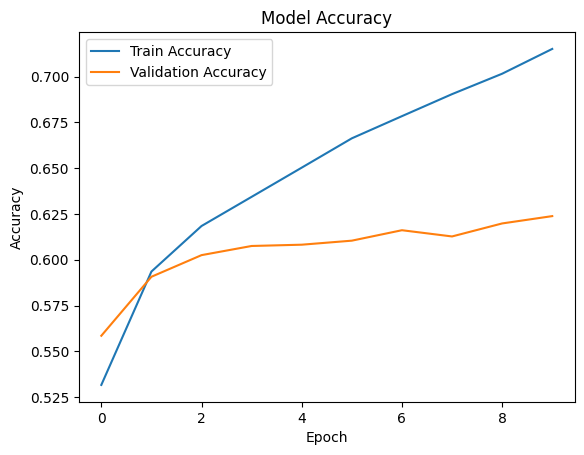

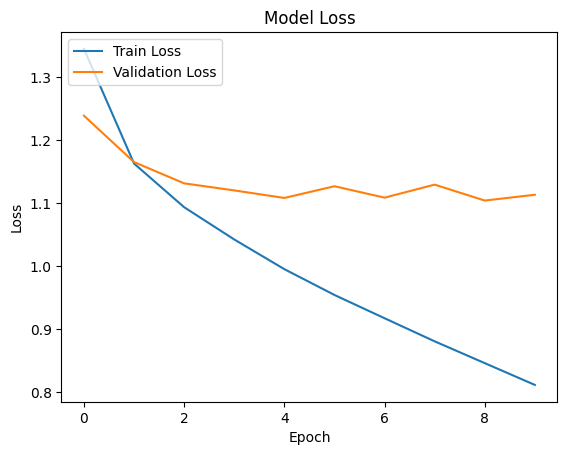

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# Evaluate the model on the test set

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 396ms/step


# Calculate Accuracy,Precision,and recall

In [ ]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Display classification report

In [ ]:
print(classification_report(y_true, y_pred_classes))